In [1]:
%%html
<marquee style="width: 50%; color:blue; font-size:300%;" ><b>https://tinyurl.com/arm20arm</b></marquee>

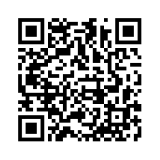

In [2]:
import requests
from PIL import Image
from io import BytesIO
r = requests.get('https://sv1.picz.in.th/images/2019/12/21/iHrsP2.th.png')

my_nb_qr = Image.open(BytesIO(r.content))
my_nb_qr

# **Example Sentiment Analysis Project**


>**ค้นคว้าอิสระ ของ นายรักษ์พล ทองมา (อาร์ม)**

>**หลักสูตรปริญญาโท วิศวกรรมคอมพิวเตอร์และเทคโนโลยีการเงิน**



# **Machine Learning Pipeline**
1.   Get Problem : แปลงโจทย์ที่อยากรู้ ให้เป็นโจทย์ทาง Machine Learning
2.   Get Data : เก็บข้อมูลที่เกี่ยวข้อง
3.   Data Cleaning : ตรวจสอบข้อมูลที่ ผิดพลาดหรือขาดหาย
4.   Feature Extraction : แปลงข้อมูลให้อยู่รูปแบบที่ สามารถป้อนเข้าโมเดลได้ (ตัวเลข)
5.   Train Model & Evaluation : สร้าง Model ตามโจทย์ปัญหา เช่น Classification แล้วทำการวัดผลเช่น Cross Validation หรือ Confusion Matrix เป็นต้น


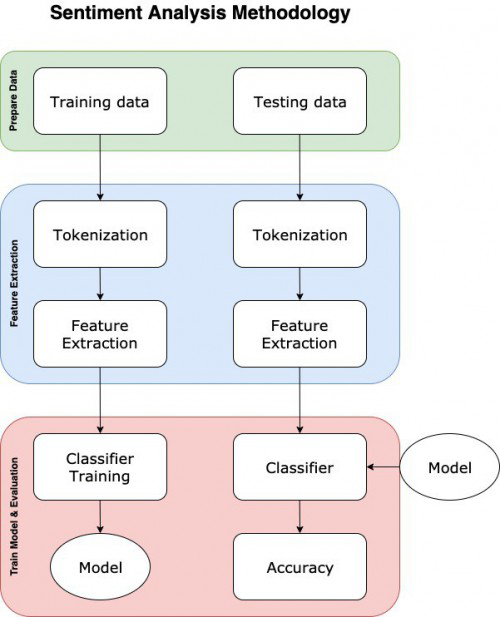

In [3]:
r_1 = requests.get('https://sv1.picz.in.th/images/2019/12/20/i8zAKl.md.jpg')

Medthod_img = Image.open(BytesIO(r_1.content))
Medthod_img

# **1 Get Problem :**

> **Problem :** นำข้อความจากการ Comment/Review สินค้าใน E-Commerce มาวิเคราะห์ อารมณ์และความรู้สึกที่มีต่อสินค้าและบริการว่าเป็น แง่บวก หรือแง่ลบ

> **Machine Learning Problem :** ใช้เทคนิค(Text Classification) เพื่อทำ Sentiment Analysis


# **2 Get Data** :

> จาก Github Ruxpolth >>https://github.com/ruxpolth/my-is

> กำหนดให้ 0 = (+) และ 1 = (-)


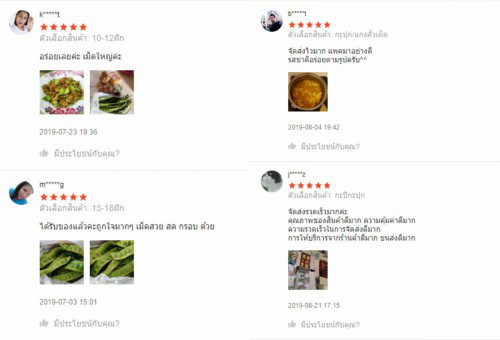

In [4]:
r_2 = requests.get('https://sv1.picz.in.th/images/2019/12/20/iHBoCP.md.jpg')
review_img = Image.open(BytesIO(r_2.content))
review_img

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

all_df = pd.read_csv('https://github.com/ruxpolth/my-is/raw/master/sentiment_data_final.csv')
all_df

,Text,Type
0,Packing ปิดไม่สนิท,1
1,Size ไม่มาตรฐาน,1
2,ก้นถุงรั่วค่ะ,1
3,กรอบ เผ็ดกำลังดี ดูใหม่และสะอาด,0
4,กรอบ อร่อยมากค่ะ,0
...,...,...
995,โอเครเลยราาคาานี้ หมดแล้วจะสั่งอีกนะคะ ชอบบบบบ...,0
996,โอเคเลยครับ,0
997,เเพ้คของไม่ดี ในรูปคือซีนดูดีมาก เเต่พอได้รับ ...,1
998,เเพ็คมาน่าเกลียด,1


# **3 Data Cleaning :**
> ตรวจสอบข้อมูลที่ ผิดพลาดหรือขาดหาย



In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Text    1000 non-null object
Type    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
# ตรวจสอบหาข้อความที่ซ้ำกัน
all_df.groupby("Type").describe()

Text                                              
     count unique                               top freq
Type                                                    
0      500    500  อร่อยดีใช้ได้ซื้อตอนลดราคาถูกมาก    1
1      500    500              ส่งผิดขนาดผิดสีมาให้    1

In [8]:
all_df['Type'].value_counts()

1    500
0    500
Name: Type, dtype: int64

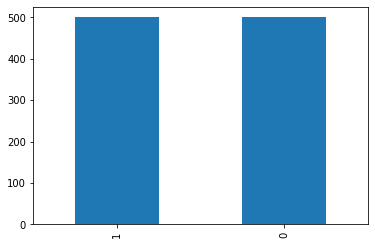

In [9]:
all_df.Type.value_counts().plot.bar()

***Train Test Split Data***

In [0]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(all_df, test_size=0.25, 
                                     random_state=1987)

In [11]:
train_df['Type'].value_counts()

1    375
0    375
Name: Type, dtype: int64

In [12]:
test_df['Type'].value_counts()

1    125
0    125
Name: Type, dtype: int64

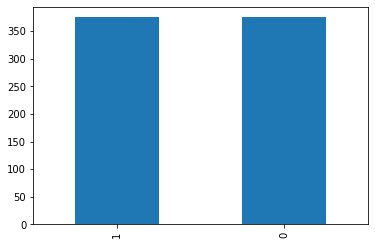

In [13]:
train_df['Type'].value_counts().plot.bar()

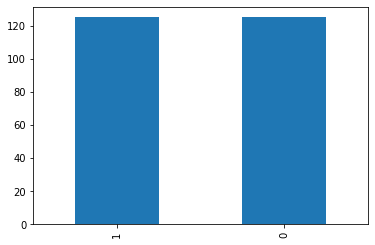

In [14]:
test_df['Type'].value_counts().plot.bar()

# **4 Feature extraction :**


> แปลงข้อมูลให้อยู่รูปแบบ ที่สามารถป้อนเข้าโมเดลได้  




***Thai Word Tokenize by pythainlp***

https://thainlp.org/pythainlp/docs/2.0/index.html



In [15]:
%pip install pythainlp

     |████████████████████████████████| 11.1MB 3.5MB/s 
     |████████████████████████████████| 1.5MB 50.2MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449907 sha256=2a85e4d8092881e9f7867c89b24af5dc36e52e45dced6bf8433bba538642752f
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
  Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0


In [0]:
from pythainlp import word_tokenize

In [18]:
word_tokenize( "ฉันรักเธอ" "เธอรักฉัน" "พ่อเธอไม่ชอบฉัน")

['ฉัน', 'รัก', 'เธอ', 'เธอ', 'รัก', 'ฉัน', 'พ่อ', 'เธอ', 'ไม่', 'ชอบ', 'ฉัน']

***Bag of Word (BOW) by scikit-learn CountVectorizer***

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
vectorizer_1 = CountVectorizer(tokenizer=word_tokenize)

In [0]:
word_list = ['ฉันรักเธอ','เธอรักฉัน','พ่อเธอไม่ชอบฉัน']

In [22]:
vectorizer_1.fit(word_list)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function word_tokenize at 0x7f722c42cea0>,
                vocabulary=None)

In [23]:
vectorizer_1.get_feature_names()

['ฉัน', 'ชอบ', 'พ่อ', 'รัก', 'เธอ', 'ไม่']

In [24]:
vectorizer_1.transform(word_list)

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [25]:
vectorizer_1.transform(word_list).toarray()
# ปัญหาที่ 1
# ปัญหาคือ BOW ไม่สนใจลำดับคำ ทำให้คำที่มีความใกล้เคียงกัน แต่มี metrix เหมือนกัน เช่น ฉันรักเธอ, เธอรักฉัน
# แก้ปัญหา โดยใช้ N-Gram 

array([[1, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0],
       [1, 1, 1, 0, 1, 1]])

In [27]:
vectorizer_1.transform(['อาจารย์ใจดีมากๆ','อเมริกาโน่อร่อยมาก','ขับดีมาก ช่วงล่างแน่น เครื่องเทอร์โบ บูสมาไวมาก']).toarray()
# ปัญหาที่ 2
# ปัญหาคือ คำที่ไม่อยู่ใน Bag of Word จะได้ feature matrix = [0,0,0,.....,n]
# แก้ปัญหาโดยหาข้อความมาสร้างเป็น Bag of Word ให้ได้มากที่สุด

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [0]:
vectorizer_2= CountVectorizer(tokenizer=word_tokenize, ngram_range=(1,2))

In [29]:
vectorizer_2.fit(word_list)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function word_tokenize at 0x7f722c42cea0>,
                vocabulary=None)

In [30]:
vectorizer_2.get_feature_names()

['ฉัน',
 'ฉัน รัก',
 'ชอบ',
 'ชอบ ฉัน',
 'พ่อ',
 'พ่อ เธอ',
 'รัก',
 'รัก ฉัน',
 'รัก เธอ',
 'เธอ',
 'เธอ รัก',
 'เธอ ไม่',
 'ไม่',
 'ไม่ ชอบ']

In [31]:
vectorizer_2.transform(word_list)

<3x14 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [32]:
word_list

['ฉันรักเธอ', 'เธอรักฉัน', 'พ่อเธอไม่ชอบฉัน']

In [33]:
vectorizer_2.transform(word_list).toarray()

array([[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1]])

In [34]:
vectorizer_2.transform(['อาจารย์ใจดีมากๆ','อเมริกาโน่อร่อยมาก','ขับดีมาก ช่วงล่างแน่น เครื่องเทอร์โบ บูสมาไวมาก']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [0]:
train_data = train_df['Text']
test_data = test_df['Text']

train_label = train_df['Type']
test_label = test_df['Type']

In [0]:
# สร้าง Function ในการตัดคำ และ ทำความสะอาดข้อมูล
def thai_token(text):
    text = text.lower() 
    text = text.replace('\n',' ')
    token = word_tokenize(text, engine="newmm")
    return token

In [0]:
feat_vector = CountVectorizer(tokenizer=thai_token, ngram_range=(1,2))

In [38]:
feat_vector.fit(train_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function thai_token at 0x7f7225662e18>,
                vocabulary=None)

In [0]:
train_feature = feat_vector.transform(train_data)
test_feature = feat_vector.transform(test_data)

In [40]:
train_feature

<750x4298 sparse matrix of type '<class 'numpy.int64'>'
	with 10846 stored elements in Compressed Sparse Row format>

In [41]:
test_feature

<250x4298 sparse matrix of type '<class 'numpy.int64'>'
	with 2650 stored elements in Compressed Sparse Row format>

In [42]:
train_feature.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [6, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]])

In [43]:
test_feature.toarray()

array([[7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

***Normalize Feature Matrix***

In [0]:
from sklearn.preprocessing import normalize

In [0]:
train_feature_normalize = normalize(train_feature)
test_feature_normalize = normalize(test_feature)

In [46]:
train_feature_normalize

<750x4298 sparse matrix of type '<class 'numpy.float64'>'
	with 10846 stored elements in Compressed Sparse Row format>

In [47]:
test_feature_normalize

<250x4298 sparse matrix of type '<class 'numpy.float64'>'
	with 2650 stored elements in Compressed Sparse Row format>

In [48]:
train_feature_normalize.toarray()

array([[0.30151134, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22941573, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2773501 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.78113347, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.55708601, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
test_feature_normalize.toarray()

array([[0.67671554, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40824829, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4472136 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22941573, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# **5. Train Model & Evaluation :**

In [0]:
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import (classification_report, make_scorer, 
                             confusion_matrix, accuracy_score, 
                             precision_score, recall_score, f1_score)

***Support Vector Machine (SVM)***

In [0]:
model_SVC = LinearSVC(random_state=1987)

In [52]:
model_SVC.fit(train_feature_normalize, train_label)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1987, tol=0.0001,
          verbose=0)

***5-Fold Cross Validation***

In [53]:
c5_SVC = cross_val_score(model_SVC, train_feature_normalize, 
                         train_label, cv=5, scoring='accuracy')
mc5_SVC = cross_val_score(model_SVC, train_feature_normalize, 
                          train_label, cv=5, scoring='accuracy').mean()
print(c5_SVC)
print(mc5_SVC)

[0.90666667 0.87333333 0.92       0.84       0.92666667]
0.8933333333333332


In [54]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

c5_SVC_CV_score = cross_validate(model_SVC, train_feature_normalize, 
                                 train_label, cv=5, scoring=(scoring))
c5_SVC_CV_score

{'fit_time': array([0.00672126, 0.0036974 , 0.00362062, 0.00336742, 0.00382948]),
 'score_time': array([0.00395608, 0.00348639, 0.00377703, 0.00374484, 0.00355554]),
 'test_accuracy': array([0.90666667, 0.87333333, 0.92      , 0.84      , 0.92666667]),
 'test_f1_score': array([0.91358025, 0.88343558, 0.92105263, 0.84810127, 0.92715232]),
 'test_precision': array([0.85057471, 0.81818182, 0.90909091, 0.80722892, 0.92105263]),
 'test_recall': array([0.98666667, 0.96      , 0.93333333, 0.89333333, 0.93333333])}

In [55]:
c5_SVC_CV_score_table = pd.DataFrame(c5_SVC_CV_score)
c5_SVC_CV_score_table

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,0.006721,0.003956,0.906667,0.850575,0.986667,0.913580
1,0.003697,0.003486,0.873333,0.818182,0.960000,0.883436
2,0.003621,0.003777,0.920000,0.909091,0.933333,0.921053
3,0.003367,0.003745,0.840000,0.807229,0.893333,0.848101
4,0.003829,0.003556,0.926667,0.921053,0.933333,0.927152


In [56]:
c5_SVC_CV_score_board = c5_SVC_CV_score_table[['test_accuracy', 
                                               'test_precision', 
                                               'test_recall', 
                                               'test_f1_score']].mean()
c5_SVC_CV_score_board

test_accuracy     0.893333
test_precision    0.861226
test_recall       0.941333
test_f1_score     0.898664
dtype: float64

***10-Fold Cross Validation***

In [57]:
c10_SVC = cross_val_score(model_SVC, train_feature_normalize, 
                          train_label, cv=10, scoring='accuracy')
mc10_SVC = cross_val_score(model_SVC, train_feature_normalize, 
                           train_label, cv=10, scoring='accuracy').mean()
print(c10_SVC)
print(mc10_SVC)

[0.94736842 0.88157895 0.84210526 0.93421053 0.92105263 0.91891892
 0.94594595 0.7972973  0.90540541 0.93243243]
0.9026315789473685


In [58]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

c10_SVC_CV_score = cross_validate(model_SVC, train_feature_normalize, 
                                  train_label, cv=10, scoring=(scoring))
c10_SVC_CV_score

{'fit_time': array([0.01030731, 0.00387144, 0.00395751, 0.00394225, 0.00515819,
        0.0040915 , 0.00408101, 0.00380182, 0.00416422, 0.00388312]),
 'score_time': array([0.00379801, 0.00354004, 0.00363898, 0.00350428, 0.00372863,
        0.00366092, 0.00366831, 0.00354052, 0.00363636, 0.00385594]),
 'test_accuracy': array([0.94736842, 0.88157895, 0.84210526, 0.93421053, 0.92105263,
        0.91891892, 0.94594595, 0.7972973 , 0.90540541, 0.93243243]),
 'test_f1_score': array([0.95      , 0.89156627, 0.85714286, 0.93670886, 0.92307692,
        0.91891892, 0.94871795, 0.8       , 0.90410959, 0.93333333]),
 'test_precision': array([0.9047619 , 0.82222222, 0.7826087 , 0.90243902, 0.9       ,
        0.91891892, 0.90243902, 0.78947368, 0.91666667, 0.92105263]),
 'test_recall': array([1.        , 0.97368421, 0.94736842, 0.97368421, 0.94736842,
        0.91891892, 1.        , 0.81081081, 0.89189189, 0.94594595])}

In [59]:
c10_SVC_CV_score_table = pd.DataFrame(c10_SVC_CV_score)
c10_SVC_CV_score_table

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,0.010307,0.003798,0.947368,0.904762,1.000000,0.950000
1,0.003871,0.003540,0.881579,0.822222,0.973684,0.891566
2,0.003958,0.003639,0.842105,0.782609,0.947368,0.857143
3,0.003942,0.003504,0.934211,0.902439,0.973684,0.936709
4,0.005158,0.003729,0.921053,0.900000,0.947368,0.923077
5,0.004092,0.003661,0.918919,0.918919,0.918919,0.918919
6,0.004081,0.003668,0.945946,0.902439,1.000000,0.948718
7,0.003802,0.003541,0.797297,0.789474,0.810811,0.800000
8,0.004164,0.003636,0.905405,0.916667,0.891892,0.904110
9,0.003883,0.003856,0.932432,0.921053,0.945946,0.933333


In [60]:
c10_SVC_CV_score_board = c10_SVC_CV_score_table[['test_accuracy', 
                                                 'test_precision', 
                                                 'test_recall', 
                                                 'test_f1_score']].mean()
c10_SVC_CV_score_board

test_accuracy     0.902632
test_precision    0.876058
test_recall       0.940967
test_f1_score     0.906357
dtype: float64

***Confusion Matrix***

In [61]:
predict_SVC = model_SVC.predict(test_feature_normalize)

con_mat_SVC = confusion_matrix(test_label, predict_SVC)
print(con_mat_SVC)

[[111  14]
 [  9 116]]


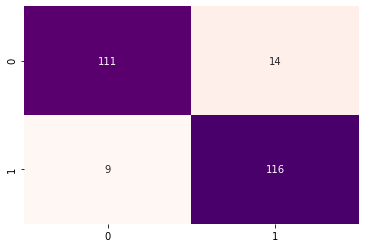

In [62]:
import seaborn

seaborn.heatmap(con_mat_SVC,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plot.show()

***Accuracy Score***

In [63]:
acc_SVC = classification_report(test_label, predict_SVC, digits=4)
print(acc_SVC)

              precision    recall  f1-score   support

           0     0.9250    0.8880    0.9061       125
           1     0.8923    0.9280    0.9098       125

    accuracy                         0.9080       250
   macro avg     0.9087    0.9080    0.9080       250
weighted avg     0.9087    0.9080    0.9080       250



***Result Table***

In [64]:
result_table = pd.DataFrame()

result_table['Text'] = test_data
result_table['Type'] = test_label
result_table['SVM_Predict'] = predict_SVC

result_list = [ x==y for x,y in zip(test_label, predict_SVC)]
result_table['Predict_result'] = result_list

result_table

,Text,Type,SVM_Predict,Predict_result
76,โกหก ใส่ไข่ โฆษณาไม่ตรงกับสินค้า ของเกรดต่ำทั้...,1,1,True
350,ทางร้านแพ็คของมาดีมากค่ะ กล่องไม่มีบุบ,0,0,True
421,ปลาก็ตัวเล็กไป และมีรอยเเตกค่ะ,1,1,True
708,เลยทิ้งทั้งหมดที่ซื้อ,1,1,True
411,บางมาก,1,1,True
...,...,...,...,...
358,ทานได้สักสามสี่ชิ้น รู้สึกหวานแบบแปล่งๆ,1,1,True
624,รถชาติไม่โอเลย,1,1,True
716,เวลาลูกค้าไม่รับของอย่าว่าเค้าเลย,1,1,True
723,ไว้จะอุดหนุนอีกแน่นอนค่ะขอบคุณมากค่ะ,0,0,True


In [65]:
result_table['Predict_result'].value_counts()

True     227
False     23
Name: Predict_result, dtype: int64

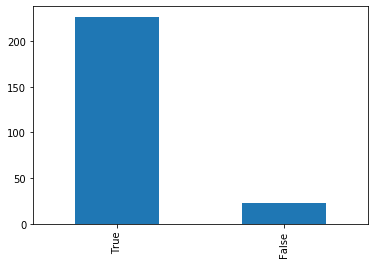

In [66]:
result_table.Predict_result.value_counts().plot.bar()

In [67]:
result_table[result_table['Predict_result']==False]

,Text,Type,SVM_Predict,Predict_result
714,วัสดุแข็งแรงทนทาน,0,1,False
587,ไม่น่าจะอุดหนุนใหม่ครั้งหน้า,1,0,False
329,ถือว่ามีความคุ้มค่าสมราคาค่ะ,0,1,False
122,คงไม่อุดหนุนอีกแน่นอน,1,0,False
146,คาดว่าจะได้ใช้บริการครั้งต่อๆไป,0,1,False
176,คุณภาพ​สินค้า​น้อยลง,1,0,False
31,การขนล่าช้ามากค่ะ,1,0,False
783,สั่งของผู้ชายได้ของผู้หญิงมาแทน,1,0,False
303,ตำน้ำพริกอรอ่ยมากๆๆๆ,0,1,False
745,ส่งมาผิดสี ค่าส่งน่าจะมากกว่าราคาสินค้า,1,0,False
